# **Laboratorijska vježba 6**: Zadaci za samostalni rad

## **Predviđanje preživaljvanja u potopu Titanika**

U ovoj laboratorijskoj vježbi istražit ćemo skup podataka koji sadrži podatke o putnicima Titanika te informaciju jesu li preživjeli potop. Ovaj skup podataka jedan od najpopularnijih skupova na stranici Kaggle jer dobro služi za uvođenje u rješavanje problema klasifikacije. Skup podataka sadrži sljedeće značajke:

* name - naziv putnika
* sex - spol putnika
* dob - dob putnika
* sibsp - broj braće/sestara/supružnika putnika na brodu
* parch - broj roditelja/djece putnika na brodu
* ticket - broj karte putnika
* fare - cijena karte putnika
* cabin - broj kabine putnika
* embarked - luka ukrcaja putnika

te izlaznu varijablu:

* survived - informacija je li putnik preživio katastrofu ili ne.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
%matplotlib inline

In [3]:
titanic = pd.read_csv('Data/titanic.csv')
titanic.head(5)

survived  surname                                     name     sex  \
0         1    Allen                   Miss. Elisabeth Walton  female   
1         1  Allison                    Master. Hudson Trevor    male   
2         0  Allison                      Miss. Helen Loraine  female   
3         0  Allison              Mr. Hudson Joshua Creighton    male   
4         0  Allison   Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked  
0  29.0000      0      0   24160  211.3375       B5        S  
1   0.9167      1      2  113781  151.5500  C22 C26        S  
2   2.0000      1      2  113781  151.5500  C22 C26        S  
3  30.0000      1      2  113781  151.5500  C22 C26        S  
4  25.0000      1      2  113781  151.5500  C22 C26        S

## **Zadatak 1: Istraživanje skupa podataka**

Istražite skup podataka na način da izračunate deskriptivnu statistiku za izlaznu varijablu. Prokomentirajte koji je udio preživjelih u potonuću Titanika.

In [4]:
X = titanic.iloc[:,1:-1]
y = titanic.iloc[:,0]

print(y.describe())
vals = y.value_counts()
print(vals)
print(f'Udio prezivjelih: {100*(vals[1]/y.count())}%')

count    1309.000000
mean        0.381971
std         0.486055
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: survived, dtype: float64
0    809
1    500
Name: survived, dtype: int64
Udio prezivjelih: 38.19709702062643%


Nacrtajte dijagram raspršenosti između izlazne varijable i svakog pojedinog stupca u skupu podataka. Pomoć: možete koristiti matricu dijagrama raspršenosti iz biblioteke pandas.

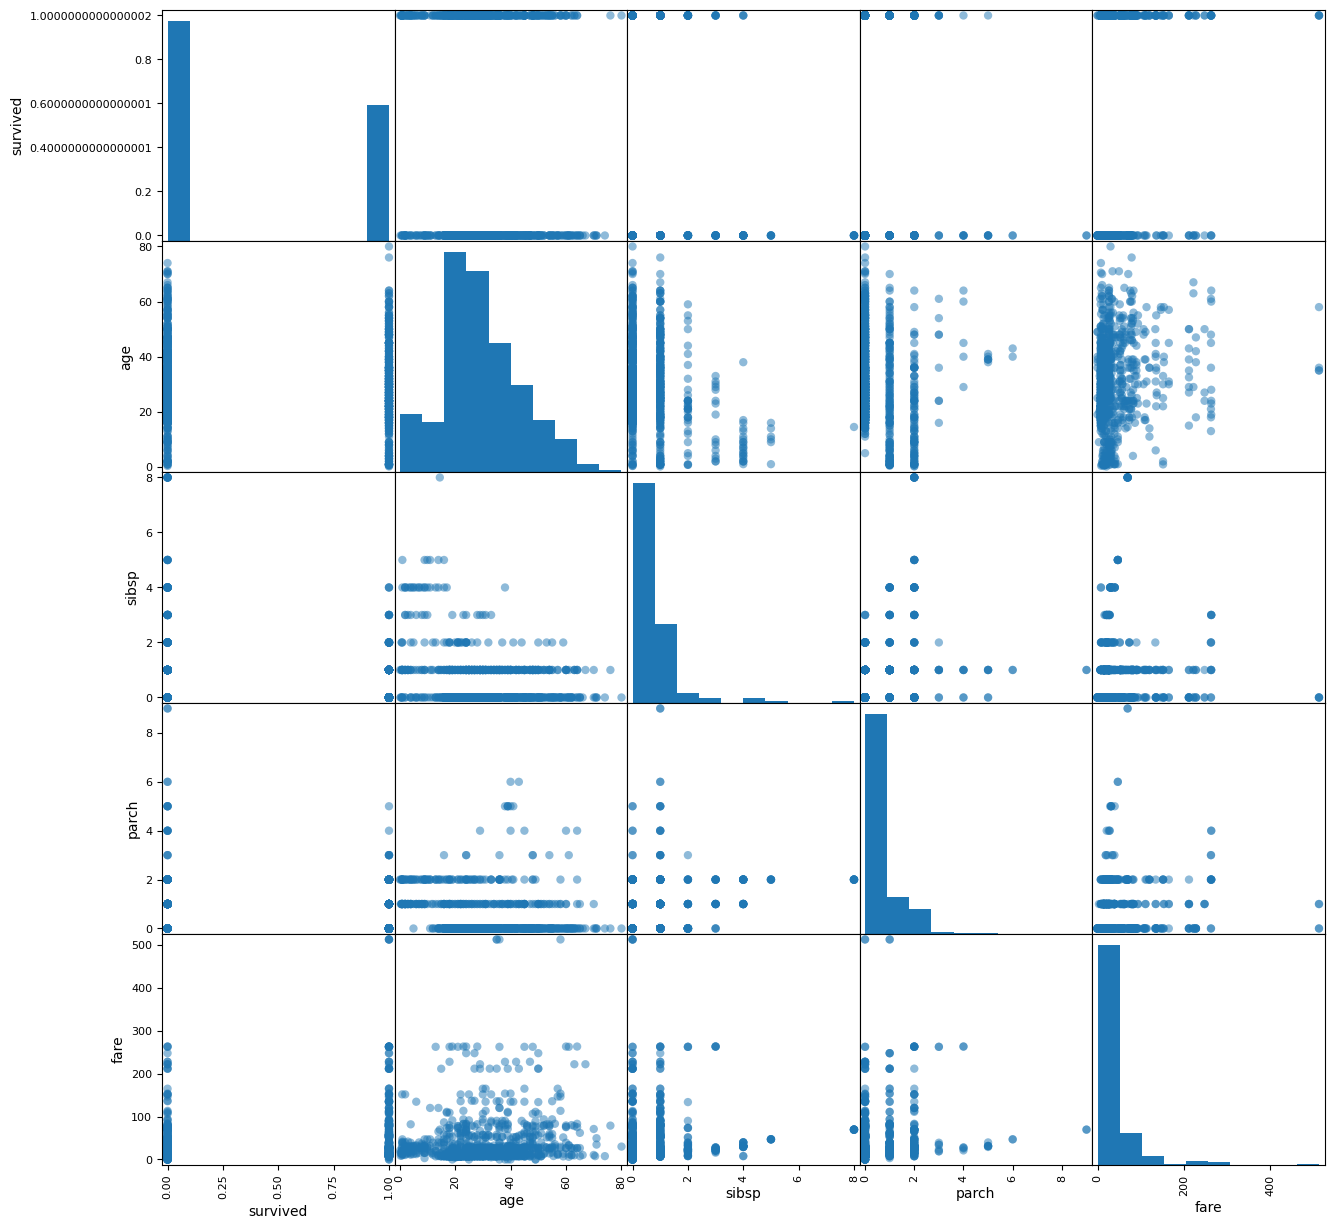

In [5]:
scatter_matrix = pd.plotting.scatter_matrix(titanic, figsize=(15, 15), marker='o')
plt.show()

Odaberite značajke koje su po Vašem mišljenju bitne za klasifikaciju preživjelih i preminulih putnika. Kategoričke stupce pretvorite u numeričke pomoću *get_dummies()* funkcije iz biblioteke pandas. Provjerite ima li nedostajućih vrijednosti u nekom od stupaca te ih popunite na prikladan način (prosječna vrijednost, medijan, najčešća vrijednost,...). 

In [6]:
print(titanic.isnull().sum())
titanic['age'].fillna(titanic['age'].median(), inplace=True)

titanic["cabin"].fillna(titanic["cabin"].mode()[0],inplace=True)

sex=pd.get_dummies(titanic["sex"])
cabin=pd.get_dummies(titanic["cabin"])

data = titanic[["age","sibsp","parch"]]
data = pd.concat([data,sex],axis=1)
data = pd.concat([data,cabin],axis=1)

data = pd.concat([data,titanic["survived"]],axis=1)
data.head()

survived       0
surname        0
name           0
sex            0
age          263
sibsp          0
parch          0
ticket         0
fare           1
cabin       1014
embarked       2
dtype: int64


age  sibsp  parch  female  male  A10  A11  A14  A16  A18  ...  F E69  \
0  29.0000      0      0       1     0    0    0    0    0    0  ...      0   
1   0.9167      1      2       0     1    0    0    0    0    0  ...      0   
2   2.0000      1      2       1     0    0    0    0    0    0  ...      0   
3  30.0000      1      2       0     1    0    0    0    0    0  ...      0   
4  25.0000      1      2       1     0    0    0    0    0    0  ...      0   

   F G63  F G73  F2  F33  F38  F4  G6  T  survived  
0      0      0   0    0    0   0   0  0         1  
1      0      0   0    0    0   0   0  0         1  
2      0      0   0    0    0   0   0  0         0  
3      0      0   0    0    0   0   0  0         0  
4      0      0   0    0    0   0   0  0         0  

[5 rows x 192 columns]

Zatim podijelite skup podataka na trening i test (u omjeru 70-30). Pripazite na to da u podskupovima za trening i test bude jednak **omjer** preživjelih i preminulih putnika.

In [7]:
from sklearn.model_selection import train_test_split

X=data.drop(["survived"],axis=1)
y=data["survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

## **Zadatak 2: Logistička regresija**

Na podskupu za trening istrenirajte model algoritma logističke regresije. Izračunajte mjere CAC, Precision, Recall i F1 na podskupu za trening i test. 

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model = LogisticRegression()
model.fit(X_train, y_train)
predicted_labels = model.predict(X_test)

# cm = confusion_matrix(y_test, predicted_labels)
# disp = ConfusionMatrixDisplay(cm)
# disp.plot()
# plt.show()

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)

train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

# ispis mjera točnosti
print("Train accuracy:", train_acc)
print("Test accuracy:", test_acc)

print("Train precision:", train_precision)
print("Test precision:", test_precision)

print("Train recall:", train_recall)
print("Test recall:", test_recall)

print("Train F1:", train_f1)
print("Test F1:", test_f1)

Train accuracy: 0.8187772925764192
Test accuracy: 0.7888040712468194
Train precision: 0.7628571428571429
Test precision: 0.7445255474452555
Train recall: 0.7628571428571429
Test recall: 0.68
Train F1: 0.762857142857143
Test F1: 0.710801393728223


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistička regresija koristi prag vjerojatnosti kako bi odlučila u koju klasu treba svrstati primjerak. U nekim slučajevima, želimo razumjeti kako se model ponaša na različitim razinama ovog praga. Iscrtajte ROC krivulju na temelju stvarnih vrijednosti izlazne varijable i predviđenih vjerojatnosti oznaka klasa koje daje logistička regresija (*predict_proba*). Izračunajte površinu ispod krivulje, odnosno vrijednost mjere AUC. 

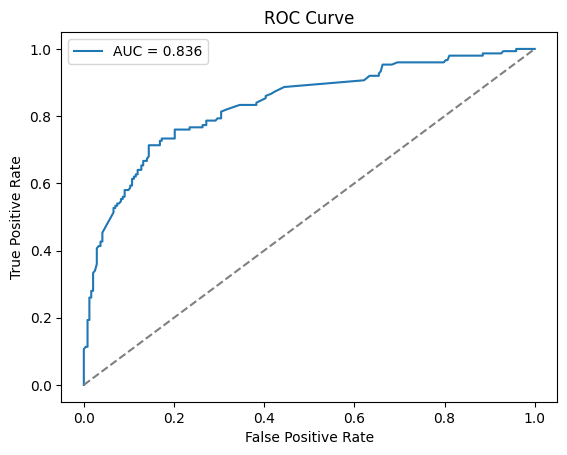

In [10]:
from sklearn.metrics import roc_curve, auc

y_pred_proba = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

auc_score = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'AUC = {auc_score:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## **Zadatak 3: Stroj potpornih vektora**

Na podskupu za trening istrenirajte model algoritma SVM s linearnom jezgrom. Ispišite jednadžbu granice između klasa te ju protumačite. Izračunajte mjere CAC, Precision, Recall i F1 na podskupu za trening i test.

In [11]:
from sklearn.svm import SVC


svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)

train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

# ispis mjera točnosti
print("Train accuracy:", train_acc)
print("Test accuracy:", test_acc)

print("Train precision:", train_precision)
print("Test precision:", test_precision)

print("Train recall:", train_recall)
print("Test recall:", test_recall)

print("Train F1:", train_f1)
print("Test F1:", test_f1)

Train accuracy: 0.8220524017467249
Test accuracy: 0.7786259541984732
Train precision: 0.7493333333333333
Test precision: 0.7299270072992701
Train recall: 0.8028571428571428
Test recall: 0.6666666666666666
Train F1: 0.7751724137931033
Test F1: 0.6968641114982579


Istražite učinkovitost algoritma SVM s različitim jezgrama (polinomijalne s različitim stupnjem te radijalne funkcije). Izračunajte mjere CAC, Precision, Recall i F1 na podskupu za trening i test te usporedite rezultate u odnosu na rezultate dobivene s linearnom jezgrom.

In [12]:
svm = SVC(kernel='poly', degree=2)
svm.fit(X_train, y_train)

y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)

train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

# ispis mjera točnosti
print("Train accuracy:", train_acc)
print("Test accuracy:", test_acc)

print("Train precision:", train_precision)
print("Test precision:", test_precision)

print("Train recall:", train_recall)
print("Test recall:", test_recall)

print("Train F1:", train_f1)
print("Test F1:", test_f1)

Train accuracy: 0.6408296943231441
Test accuracy: 0.6437659033078881
Train precision: 0.8888888888888888
Test precision: 0.9166666666666666
Train recall: 0.06857142857142857
Test recall: 0.07333333333333333
Train F1: 0.1273209549071618
Test F1: 0.1358024691358025


Istražite učinkovitost algoritma SVM sa složenijim jezgrama kada se pri njegovu treniranju koristi regularizacija. Isprobajte nekoliko vrijednosti za koeficijent regularizacije te prokomentirajte dobivene rezultate. 

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

C_values = [0.1, 1.0, 10.0]

for C in C_values:
    svm = SVC(kernel='rbf', C=C)
    svm.fit(X_train, y_train)
    scores = cross_val_score(svm, X, y, cv=5)

    print("C = {}, Average score = {:.2f}, Standard deviation = {:.2f}".format(C, scores.mean(), scores.std()))

    y_train_pred = svm.predict(X_train)
    y_test_pred = svm.predict(X_test)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    train_precision = precision_score(y_train, y_train_pred)
    test_precision = precision_score(y_test, y_test_pred)

    train_recall = recall_score(y_train, y_train_pred)
    test_recall = recall_score(y_test, y_test_pred)

    train_f1 = f1_score(y_train, y_train_pred)
    test_f1 = f1_score(y_test, y_test_pred)

    # ispis mjera točnosti
    print("Train accuracy:", train_acc)
    print("Test accuracy:", test_acc)

    print("Train precision:", train_precision)
    print("Test precision:", test_precision)

    print("Train recall:", train_recall)
    print("Test recall:", test_recall)

    print("Train F1:", train_f1)
    print("Test F1:", test_f1)


C = 0.1, Average score = 0.62, Standard deviation = 0.00


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train accuracy: 0.6179039301310044
Test accuracy: 0.6183206106870229
Train precision: 0.0
Test precision: 0.0
Train recall: 0.0
Test recall: 0.0
Train F1: 0.0
Test F1: 0.0
C = 1.0, Average score = 0.62, Standard deviation = 0.01
Train accuracy: 0.6375545851528385
Test accuracy: 0.6361323155216285
Train precision: 0.725
Test precision: 0.6521739130434783
Train recall: 0.08285714285714285
Test recall: 0.1
Train F1: 0.14871794871794872
Test F1: 0.17341040462427745
C = 10.0, Average score = 0.79, Standard deviation = 0.05
Train accuracy: 0.7969432314410481
Test accuracy: 0.7938931297709924
Train precision: 0.742603550295858
Test precision: 0.7555555555555555
Train recall: 0.7171428571428572
Test recall: 0.68
Train F1: 0.7296511627906976
Test F1: 0.7157894736842104


## **Zadatak 4: Algoritam najbližih susjeda**

Na podskupu za trening istrenirajte algoritam KNN s različitim postavkama parametra $k$. Izračunajte mjere CAC, Precision, Recall i F1 na podskupu za trening i test te prokomentirajte dobivene rezultate.

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

for k in [1, 3, 5, 7, 9]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)

    print(f"k = {k}")
    print("Train")
    print(classification_report(y_train, y_train_pred))
    print("Test")
    print(classification_report(y_test, y_test_pred))

k = 1
Train
              precision    recall  f1-score   support

           0       0.93      0.71      0.80       566
           1       0.66      0.91      0.76       350

    accuracy                           0.78       916
   macro avg       0.79      0.81      0.78       916
weighted avg       0.82      0.78      0.79       916

Test
              precision    recall  f1-score   support

           0       0.71      0.58      0.64       243
           1       0.48      0.61      0.54       150

    accuracy                           0.60       393
   macro avg       0.59      0.60      0.59       393
weighted avg       0.62      0.60      0.60       393

k = 3
Train
              precision    recall  f1-score   support

           0       0.81      0.76      0.78       566
           1       0.64      0.71      0.67       350

    accuracy                           0.74       916
   macro avg       0.72      0.73      0.73       916
weighted avg       0.74      0.74      0.74  

Iscrtajte ovisnost mjere CAC o veličini susjedstva ($k$) za podskupove za trening i test. Koristite linijski dijagram.

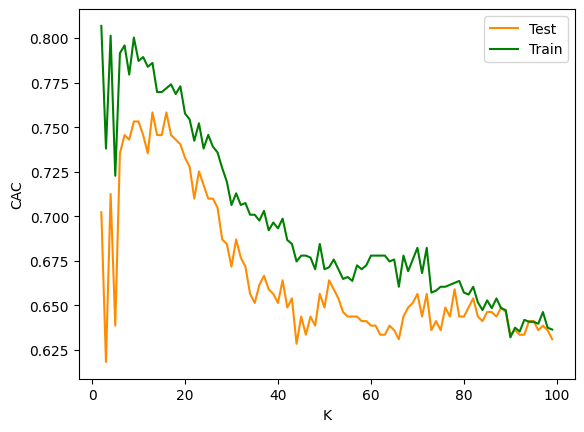

In [15]:
K = range(2,100)
cac_test = []
cac_train = []

for k in K:
    knm = KNeighborsClassifier(n_neighbors=k)
    knm.fit(X_train, y_train)
    y_train_pred = knm.predict(X_train)
    y_test_pred = knm.predict(X_test)
    cac_test.append(accuracy_score(y_test,y_test_pred))
    cac_train.append(accuracy_score(y_train,y_train_pred))

plt.plot(K,cac_test,label="Test", c='darkorange')
plt.plot(K,cac_train,label="Train", c='green')
plt.xlabel("K")
plt.ylabel("CAC")
plt.legend()
plt.show()

## **Zadatak 5: Stablo odluke**

Na podskupu za trening istrenirajte algoritam DT s različitim postavkama za dubinu stabla. Izračunajte mjere CAC, Precision, Recall i F1 na podskupu za trening i test te prokomentirajte dobivene rezultate.

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

depths = range(1, 11)
train_acc_scores = []
train_prec_scores = []
train_rec_scores = []
train_f1_scores = []
test_acc_scores = []
test_prec_scores = []
test_rec_scores = []
test_f1_scores = []

for depth in depths:
    # stvaranje instance modela
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)

    # treniranje modela
    dt.fit(X_train, y_train)

    # predikcija na podacima za treniranje i testiranje
    train_preds = dt.predict(X_train)
    test_preds = dt.predict(X_test)

    # izračun mjera točnosti
    train_acc_scores.append(accuracy_score(y_train, train_preds))
    test_acc_scores.append(accuracy_score(y_test, test_preds))

    # izračun mjera preciznosti
    train_prec_scores.append(precision_score(y_train, train_preds))
    test_prec_scores.append(precision_score(y_test, test_preds))

    # izračun mjera odziva
    train_rec_scores.append(recall_score(y_train, train_preds))
    test_rec_scores.append(recall_score(y_test, test_preds))

    # izračun mjera F1
    train_f1_scores.append(f1_score(y_train, train_preds))
    test_f1_scores.append(f1_score(y_test, test_preds))

# ispis rezultata
for depth in depths:
    print("Depth: ", depth)
    print("Train accuracy: ", train_acc_scores[depth-1])
    print("Train precision: ", train_prec_scores[depth-1])
    print("Train recall: ", train_rec_scores[depth-1])
    print("Train F1: ", train_f1_scores[depth-1])
    print("Test accuracy: ", test_acc_scores[depth-1])
    print("Test precision: ", test_prec_scores[depth-1])
    print("Test recall: ", test_rec_scores[depth-1])
    print("Test F1: ", test_f1_scores[depth-1])
    print("="*50)

Depth:  1
Train accuracy:  0.777292576419214
Train precision:  0.718562874251497
Train recall:  0.6857142857142857
Train F1:  0.7017543859649122
Test accuracy:  0.7862595419847328
Test precision:  0.75
Test recall:  0.66
Test F1:  0.702127659574468
Depth:  2
Train accuracy:  0.777292576419214
Train precision:  0.718562874251497
Train recall:  0.6857142857142857
Train F1:  0.7017543859649122
Test accuracy:  0.7862595419847328
Test precision:  0.75
Test recall:  0.66
Test F1:  0.702127659574468
Depth:  3
Train accuracy:  0.7958515283842795
Train precision:  0.7308781869688386
Train recall:  0.7371428571428571
Train F1:  0.7339971550497866
Test accuracy:  0.7964376590330788
Test precision:  0.7430555555555556
Test recall:  0.7133333333333334
Test F1:  0.727891156462585
Depth:  4
Train accuracy:  0.8155021834061136
Train precision:  0.7685459940652819
Train recall:  0.74
Train F1:  0.7540029112081514
Test accuracy:  0.8091603053435115
Test precision:  0.7777777777777778
Test recall:  0.7
T

Iscrtajte ovisnost mjere CAC o dubini stabla za podskupove za trening i test. Koristite linijski dijagram.

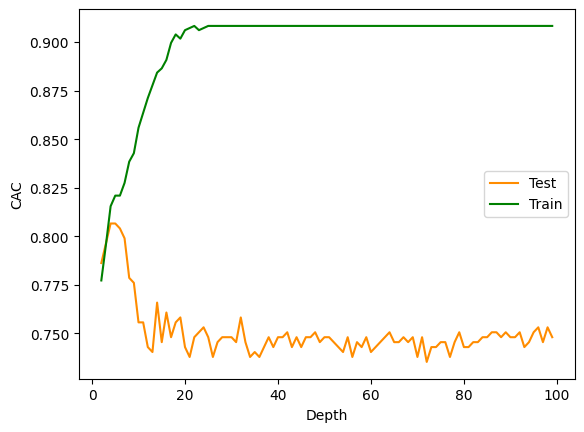

In [17]:
Depth = range(2,100)
cac_test = []
cac_train = []

for d in Depth:
    dtm = DecisionTreeClassifier(max_depth=d)
    dtm.fit(X_train, y_train)
    y_train_pred = dtm.predict(X_train)
    y_test_pred = dtm.predict(X_test)
    cac_test.append(accuracy_score(y_test,y_test_pred))
    cac_train.append(accuracy_score(y_train,y_train_pred))

plt.plot(Depth,cac_test,label="Test", c='darkorange')
plt.plot(Depth,cac_train,label="Train", c='green')
plt.xlabel("Depth")
plt.ylabel("CAC")
plt.legend()
plt.show()